# Predictor

Predictorクラスは、Nステップ先の予測を行います。内部的には、このクラスは Classifiers を使用して SDR を未来の値に関連付けます。このクラスは、データポイントの欠落を処理します。

互換性に関する注意: このクラスは、古い SDRClassifier の代替クラスです。実際の値の推定値は提供されなくなりました。

引数の steps は、学習して予測する未来へのステップ数です。Predictorはステップのリストを受け取ります。

引数 alpha は、学習中に重み行列を適応させるために使用されます。アルファを大きくすると、データへの適応が速くなります。

## メソッド

- `infer(...)`：尤度(ユウド/likelihoods)を計算する。引数パターンは、アクティブな入力ビットを含むSDRである。キーが予測ステップ、値がPDFであるディクショナリを返します。PDFについての詳細は、help(Classifier.infer)を参照してください。
 
-  `learn(...)` ：事例データから学ぶ。引数 recordNum は各レコードのインクリメント整数です。 数字の空白はレコードの欠落に対応します。 引数 pattern は、アクティブな入力ビットを含む SDR です。 引数 classification は、現在のカテゴリまたはバケットインデックスです。 入力に複数のカテゴリがある場合は、リストにすることもできる。
 
-  `reset(...)` ：時系列データセットで使用します。

In [1]:
import numpy as np
from htm.bindings.sdr import SDR
from htm.bindings.algorithms import Predictor

# 未来への1と2のタイムステップを予測します。

# 4つのランダムなSDRのシーケンスを作成し、
# 各SDRは1000ビットと2％のスパースパリティを持っています。
sequence = [ SDR( 1000 ).randomize( 0.02 ) for i in range(4) ]

# シーケンスのカテゴリラベルを作成します。
labels = [ 4, 5, 6, 7 ]
 
# 予測器を作って、それを鍛える。
pred = Predictor([ 1, 2 ])
pred.learn( 0, sequence[0], labels[0] )
pred.learn( 1, sequence[1], labels[1] )
pred.learn( 2, sequence[2], labels[2] )
pred.learn( 3, sequence[3], labels[3] )

# 予測器に部分的な情報を与え、将来の予測をする。
pred.reset()
A = pred.infer( sequence[0] )

print("-"*70 )
print("PDF TimeStep A: ",A)

np.argmax( A[1] )  #->  labels[1]
np.argmax( A[2] )  #->  labels[2]

print("-"*70 )
print("predict label: ",np.argmax( A[1] ) )
print("predict label: ",np.argmax( A[2] ) )

B = pred.infer( sequence[1] )

print("-"*70 )
print("PDF TimeStep B: ",B)

np.argmax( B[1] )  #->  labels[2]
np.argmax( B[2] )  #->  labels[3]

print("-"*70 )
print("predict label: ",np.argmax( B[1] ) )
print("predict label: ",np.argmax( B[2] ) )

----------------------------------------------------------------------
PDF TimeStep A:  {2: [0.12462510106958143, 0.12462510106958143, 0.12462510106958143, 0.12462510106958143, 0.12462510106958143, 0.12462510106958143, 0.12714267933442205, 0.12510672392825561], 1: [0.12456362377948811, 0.12456362377948811, 0.12456362377948811, 0.12456362377948811, 0.12456362377948811, 0.1270799578588076, 0.12510456773500278, 0.12499738118536398]}
----------------------------------------------------------------------
predict label:  5
predict label:  6
----------------------------------------------------------------------
PDF TimeStep B:  {2: [0.12466737700352379, 0.12466737700352379, 0.12466737700352379, 0.12466737700352379, 0.12466737700352379, 0.12466737700352379, 0.12479179464958992, 0.12720395047302854], 1: [0.12460438372501093, 0.12460438372501093, 0.12460438372501093, 0.12460438372501093, 0.12460438372501093, 0.12472869395281962, 0.12714267162622545, 0.12510671631202053]}
------------------------

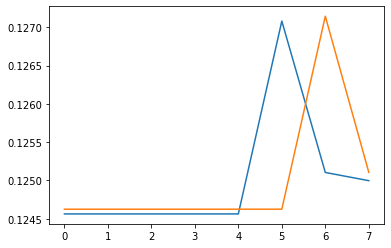

In [3]:
import matplotlib.pyplot as plt
plt.plot(A[1] )
plt.plot(A[2] )
plt.show()

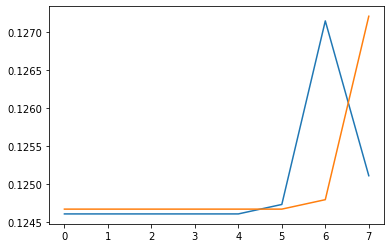

In [4]:
import matplotlib.pyplot as plt
plt.plot(B[1] )
plt.plot(B[2] )
plt.show()